In [46]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, ImageColorGenerator
import json
from collections import Counter, defaultdict
import seaborn as sns
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import plotly.graph_objects as go

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miked\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part-1: Authorization and Search tweets

## Getting authorization

In [47]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAJibXwEAAAAAUYGtsTnehTeLIgqfD8vbqwP%2F6ec%3Dm6DL8XQD9YaQeSjzWzW3QsYTl7sjOB1KNpJqMnN9RlNDHEbisl"

client = tweepy.Client(bearer_token)

# Your start and end time for fetching tweets
start_time = "2022-01-20T00:00:00Z"
end_time = "2022-02-20T00:00:00Z"

# Part-2: Sentiment Analysis Report

## Get List Tweets

In [48]:
id="1389185739313795076"

tweets = client.get_list_tweets(id=id,
                                   tweet_fields=['context_annotations','created_at','geo'],
                                   user_fields = ["name", "username", "location", "verified", "description"],
                                   max_results=100,
                                   expansions='author_id')

for tweet in tweets.data:
    print(tweet)

As more NFT communities drop 3D avatar files to explore the metaverse with just know @ImmaDegen were first to land and brought gud vibes 👽🥦🔥 https://t.co/YnbYvwCjZd https://t.co/kr1IRT8Uv3
Walt Peregoy (1925 - 2015) 1957 preliminary background illustration for Disney's "Paul Bunyan". https://t.co/5gPfIPQqIU
Gn. https://t.co/9FRlJao2Ij
https://t.co/dgNBWTMCvs
RT @HeroGalaxyNFT: Are we going to be the first NFT project to build a bespoke artificial intelligence? Sorry @awscloud for poaching all yo…
I HAVE A SECRET GOAL OF BEING THE DAVID BOWIE OF NFT WORLD LOL.....

THERE'S ONLY ONE DAVID BOWIE BUT.......AS FAR AS EVER CHANGING ARTISTS WHO CAN MORPH AT WILL, HE'S ALWAYS BEEN MY FAVORITE ARTIST THAT COULD DO SUCH THINGS.
👀 jSword_vault_1 ↗️ flipped ↗️ MAYC #8266
https://t.co/PkpTsOf3Sz

🏆 status: Tax Loss Harvesting
🛒 in: 15 ETH
💰 out: 27 ETH
😬 hodl: 4 months 16 days 

 Ξ  profit: +12 ETH 🔥

💲spent: $60,990 (12/2021)
💲lost: -$5,559 (📉 -9%) https://t.co/j7kOXhhYt7
103 - not 102!
@StephSutt

In [49]:
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0

for tweet in tweepy.Paginator(client.get_list_tweets, id=id,
                                   tweet_fields=['context_annotations','created_at','geo'],
                                   user_fields = ["name", "username", "location", "verified", "description"],
                                   expansions='author_id').flatten(limit=800):
    
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1

#tweet specific info
print(len(tweets.data))
#user specific info
print(len(tweets.includes["users"]))

print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

94
54
Total Positive =  274
Total Negative =  99
Total Neutral =  400


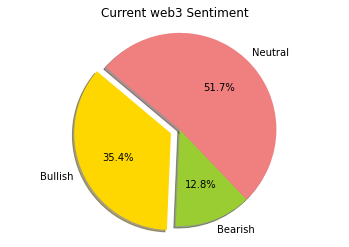

In [50]:
#Plotting sentiments
labels = 'Bullish', 'Bearish', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Current web3 Sentiment')
plt.axis('equal')
plt.show()

In [51]:
# first tweet
first_tweet = tweets.data[0]
dict(first_tweet)

{'context_annotations': [{'domain': {'id': '30',
    'name': 'Entities [Entity Service]',
    'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'},
   'entity': {'id': '848920371311001600',
    'name': 'Technology',
    'description': 'Technology and computing'}},
  {'domain': {'id': '165',
    'name': 'Technology',
    'description': 'for individual and types of technology, e.g., food technology, 3D printing'},
   'entity': {'id': '848920371311001600',
    'name': 'Technology',
    'description': 'Technology and computing'}}],
 'author_id': 780281883875651584,
 'text': 'As more NFT communities drop 3D avatar files to explore the metaverse with just know @ImmaDegen were first to land and brought gud vibes 👽🥦🔥 https://t.co/YnbYvwCjZd https://t.co/kr1IRT8Uv3',
 'created_at': datetime.datetime(2022, 5, 15, 3, 41, 5, tzinfo=datetime.timezone.utc),
 'id': 1525682654376599552}

In [52]:
# user information for the first tweet
first_tweet_user = tweets.includes["users"][0]
dict(first_tweet_user)

{'verified': False,
 'description': '🔍 Research | Web | VR/AR | NFTs  \n🥼 Metaverse interoperability\n🛠 @themetafactory @m3org',
 'location': '127.0.0.1',
 'name': 'jin',
 'id': 780281883875651584,
 'username': 'dankvr'}

# Part-3: Creating Dataframe of Tweets

In [53]:
# create a list of records
tweet_info_ls = []

# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)

# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)

tweets_df.shape

# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-05-15 03:41:05+00:00,As more NFT communities drop 3D avatar files t...,None,jin,dankvr,127.0.0.1,False,🔍 Research | Web | VR/AR | NFTs \n🥼 Metaverse...
1,2022-05-15 03:40:33+00:00,Walt Peregoy (1925 - 2015) 1957 preliminary ba...,None,rfdz,zdfrp,Swamp,False,🥶 bayc2751.eth
2,2022-05-15 03:40:27+00:00,Gn. https://t.co/9FRlJao2Ij,None,BowTiedRobin | Child Prodigy,BowTiedRobin,None,False,Inspired by @BowTiedBull. \n\nI give actionabl...
3,2022-05-15 03:39:38+00:00,https://t.co/dgNBWTMCvs,None,Colombo,Jdotcolombo,None,False,Contemporary artist x Legal cannabis brand own...
4,2022-05-15 03:39:31+00:00,RT @HeroGalaxyNFT: Are we going to be the firs...,None,freaknjoe,freaknjoe,None,False,BAYC #4095 @boredapeyc - Hero Galaxy maxi @her...


# Part-4 - Cleaning Data

In [54]:
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweets_df['text'] = np.vectorize(remove_pattern)(tweets_df['text'], "@[\w]*")
tweets_df['text'] = np.vectorize(remove_pattern)(tweets_df['text'], "#[\w]*")

tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-05-15 03:41:05+00:00,As more NFT communities drop 3D avatar files t...,None,jin,dankvr,127.0.0.1,False,🔍 Research | Web | VR/AR | NFTs \n🥼 Metaverse...
1,2022-05-15 03:40:33+00:00,Walt Peregoy (1925 - 2015) 1957 preliminary ba...,None,rfdz,zdfrp,Swamp,False,🥶 bayc2751.eth
2,2022-05-15 03:40:27+00:00,Gn. https://t.co/9FRlJao2Ij,None,BowTiedRobin | Child Prodigy,BowTiedRobin,None,False,Inspired by @BowTiedBull. \n\nI give actionabl...
3,2022-05-15 03:39:38+00:00,https://t.co/dgNBWTMCvs,None,Colombo,Jdotcolombo,None,False,Contemporary artist x Legal cannabis brand own...
4,2022-05-15 03:39:31+00:00,RT : Are we going to be the first NFT project ...,None,freaknjoe,freaknjoe,None,False,BAYC #4095 @boredapeyc - Hero Galaxy maxi @her...


In [55]:
tweets_df['location'].head(100)

0                          127.0.0.1
1                              Swamp
2                               None
3                               None
4                               None
5         TORRANCE BEACH PARKING LOT
6                          Metaverse
7                      The Metaverse
8                          Rochester
9            $SOL | $ETH blockchains
10                    Washington, DC
11                New York, New York
12                              None
13                             Ocean
14                     Somnium Space
15                              None
16              Psychedelic Universe
17                      Gooch island
18                     The Metaverse
19                    illkoncept.eth
20                              Home
21                         Metaverse
22              The Ethereal Enclave
23                              Meta
24                     Charlotte, NC
25                  The Valet Stand 
26                              None
2

# Part-5: Visualization

<AxesSubplot:>

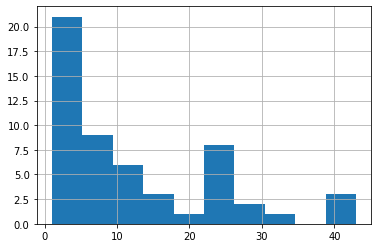

In [56]:
stop=set(stopwords.words('english'))

#Words used in tweets
tweets_df['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

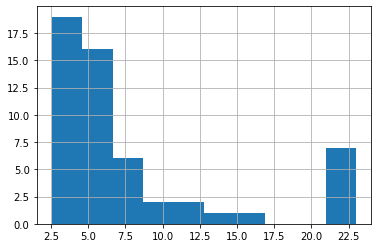

In [57]:
#Average Word Length
tweets_df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [58]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new = tweets_df['text'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

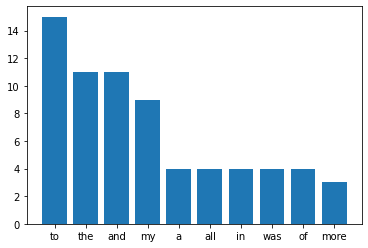

In [59]:
plot_top_stopwords_barchart(tweets_df['text'])

In [60]:
def plot_topwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new = tweets_df['text'].str.split()
    new=new.values.tolist()
    
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    x, y= [], []
    for word in corpus:
        if word not in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

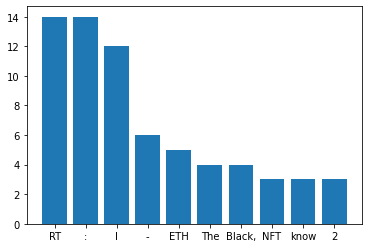

In [61]:
plot_topwords_barchart(tweets_df['text'])

In [62]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

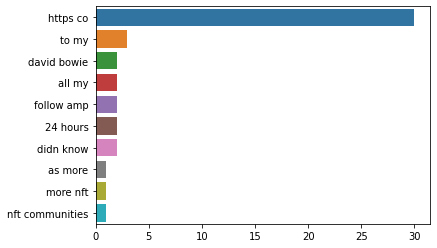

In [63]:
plot_top_ngrams_barchart(tweets_df['text'],2)

In [65]:
#Cleaning Tweets
corpus = []
for i in range(0, 54):
    #[a-zA-Z_][a-zA-Z0-9_]
    tweet = re.sub('[^a-zA-Z]', ' ', tweets_df['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('t.co', '', tweet)
    tweet = re.sub('amp', '', tweet)
    tweet = tweet.split()
    corpus.append(tweet)
    corpi = list(itertools.chain(*corpus))
print(corpi)

['as', 'more', 'nfmmunities', 'drop', 'd', 'avatar', 'files', 'to', 'explore', 'the', 'metaverse', 'with', 'just', 'know', 'were', 'first', 'to', 'land', 'and', 'brought', 'gud', 'vibes', 's', 'ynbyvwcjzd', 's', 'kr', 'i', 'uv', 'walt', 'peregoy', 'preliminary', 'background', 'illustration', 'for', 'disney', 's', 'paul', 'bunyan', 's', 'gpfipqqiu', 'gn', 's', 'frljao', 'ij', 's', 'dgnbwtmcvs', 'are', 'we', 'going', 'to', 'be', 'the', 'first', 'nft', 'project', 'to', 'build', 'a', 'bespoke', 'aificial', 'intelligence', 'sorry', 'for', 'poaching', 'all', 'yo', 'i', 'have', 'a', 'secret', 'goal', 'of', 'being', 'the', 'david', 'bowie', 'of', 'nft', 'world', 'lol', 'there', 's', 'only', 'one', 'david', 'bowie', 'but', 'as', 'far', 'as', 'ever', 'changing', 'aists', 'who', 'can', 'morph', 'at', 'will', 'he', 's', 'always', 'been', 'my', 'favorite', 'aist', 'thauld', 'do', 'such', 'things', 'jsword', 'vault', 'flipped', 'mayc', 's', 'pkptsof', 'sz', 'status', 'tax', 'loss', 'harvesting', 'in

<AxesSubplot:>

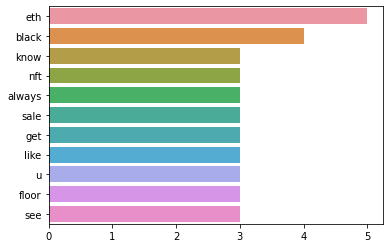

In [66]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets_df['text'])

from collections import Counter
Counter = Counter(corpi)
most = Counter.most_common() 

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [67]:
fig = go.Figure(data=[go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])

fig.show()

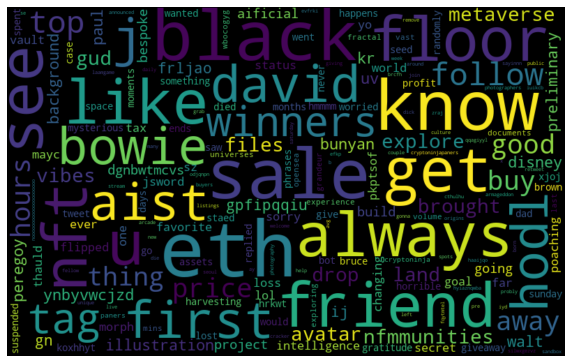

In [68]:
#Word Cloud
all_words = ' '.join([text for text in corpi])
wordcloud = WordCloud(stopwords=stop, width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [69]:
mask = np.array(Image.open("C:/Users/miked/OneDrive/Pictures/mferbg.png"))

In [70]:
wc = WordCloud(stopwords=stop,
               mask=mask, background_color="white",
               max_words=1000, max_font_size=30,
               random_state=42, width=mask.shape[1],
               contour_width=5, contour_color='black',
               height=mask.shape[0])
wc.generate(all_words)

In [71]:
# create coloring from image
image_colors = ImageColorGenerator(mask)

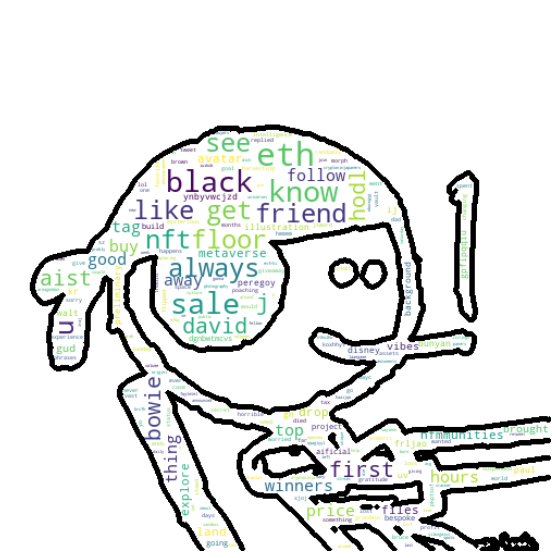

In [72]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

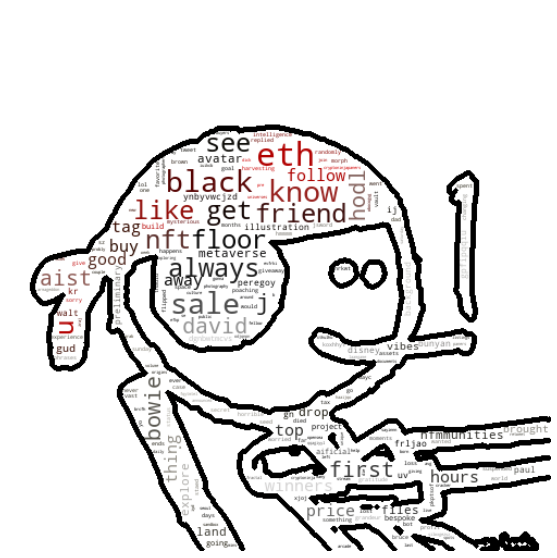

In [73]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')
plt.show()

### Vader Sentiment Analysis
#### Works better in detecting negative sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\miked\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

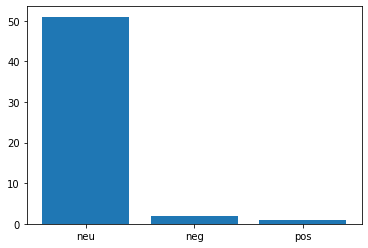

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

tweets_df['polarity']=tweets_df['text'].\
    map(lambda x: get_vader_score(x))
polarity=tweets_df['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

### textBlob Sentiment Analysis

<BarContainer object of 3 artists>

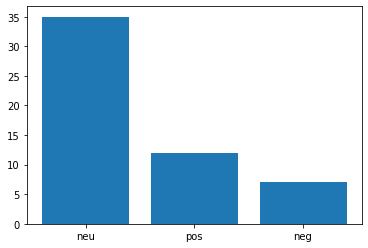

In [75]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

tweets_df['polarity_score']=tweets_df['text'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
tweets_df['polarity']=tweets_df['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(tweets_df.polarity.value_counts().index,
        tweets_df.polarity.value_counts())

<AxesSubplot:>

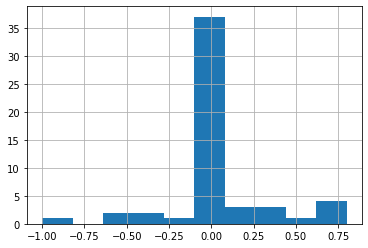

In [76]:
tweets_df['polarity_score'].hist()